In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class Account:
    def __init__(
            self,
            base,
            interest_rate,
            monthly_amount=0,
            profit=0,
    ):
        self.index = 0
        self.base = base
        self.current = base
        self.interest_rate = interest_rate
        self.monthly_amount = monthly_amount
        self.profit = profit
        self.history = pd.DataFrame(
            columns=['year', 'month', 'current', 'base', 'profit'],
        )

    def calc_yearly(self, year, month):
        self.profit += (self.current * (1 + (self.interest_rate)) - self.current)
        self.current = self.base + self.profit
        self.base = self.base + self.monthly_amount
        self.history = pd.concat(
            [self.history,
             pd.DataFrame({
                 'year': year,
                 'month': 0,
                 'current': self.current,
                 'base': self.base,
                 'profit': self.profit,
             })],
            ignore_index=True,
        )

    def calc_monthly(self, year, month):
        self.profit += (self.current * self.interest_rate / 12)
        self.current = self.base + self.profit
        self.base = self.base + self.monthly_amount
        temp = pd.DataFrame({
            'year': year,
            'month': month,
            'current': self.current,
            'base': self.base,
            'profit': self.profit,
        }, index=[self.index])
        self.history = pd.concat([self.history, temp])
        self.index += 1

In [3]:
account = Account(
    base=1_000_000,
    interest_rate=0.05,
    # monthly_amount=1_000_000,
)
N=10
for y in range(1, N + 1):
    for m in range(1, 13):
        account.calc_monthly(y, 12)

account.history[account.history['month'] == 12]

,year,month,current,base,profit
0,1,12,1004166.666667,1000000,4166.666667
1,1,12,1008350.694444,1000000,8350.694444
2,1,12,1012552.155671,1000000,12552.155671
3,1,12,1016771.122987,1000000,16771.122987
4,1,12,1021007.669332,1000000,21007.669332
...,...,...,...,...,...
115,10,12,1619842.912978,1000000,619842.912978
116,10,12,1626592.258449,1000000,626592.258449
117,10,12,1633369.726192,1000000,633369.726192
118,10,12,1640175.433385,1000000,640175.433385


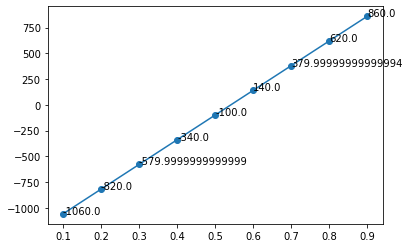

In [31]:
percentages = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
no_cost = 0
cost = 100
profit = 2300
loss = -2500
expected = np.zeros(len(percentages))
for index, percentage in enumerate(percentages):
    expected[index] = (
      (loss - cost) * (1 - percentage) +
      (profit - cost) * (percentage)
    ) / 2

plt.plot(percentages, expected, marker='o')
for i, value in enumerate(expected):
    plt.text(percentages[i], expected[i], value)
